In [158]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
from numpy.random import randn

from scipy import stats
import statistics

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [112]:
titanic_df = pd.read_csv('train.csv')

# quick look at data!
titanic_df.info
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


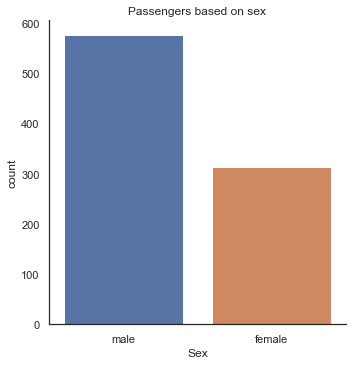

In [113]:
# who are the passengers on Titanic?
sns.catplot(x = 'Sex',data = titanic_df, kind = 'count')
sns.countplot(x = 'Sex',data = titanic_df,saturation = 0.8)
plt.title('Passengers based on sex')
plt.savefig('p_sex.png')

<AxesSubplot:xlabel='Sex', ylabel='count'>

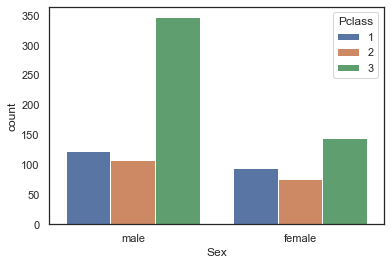

In [114]:
# making a countplot based on sex and hue based on passenger class
sns.countplot(x = 'Sex',data = titanic_df,hue = 'Pclass')

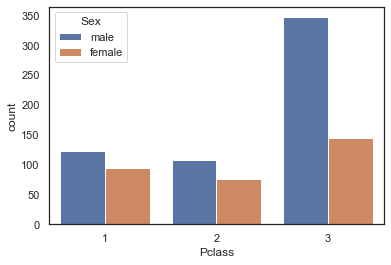

In [115]:
# countplot based on passenger class and hue based on sex
sns.countplot(x = 'Pclass',data = titanic_df,hue = 'Sex')
plt.savefig('pclass_sex.png')

In [116]:
# creating a function called male_female_child(a new object):
#    age,sex are columns from the dataset and assigning them to passenger

# if age is lower than 16:
# return 'child'
# anything else, return sex which is based on the original variable

def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [117]:
# creating a new column(variable) called person
# making a list of Age and Sex and applying them to the function created above and placing the results on the column
# which is expressed in axis = 1 

titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis = 1)

In [118]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


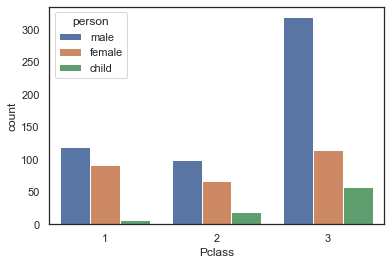

In [119]:
sns.countplot(x = 'Pclass',data = titanic_df,hue = 'person')
plt.savefig('pclass_person.png')

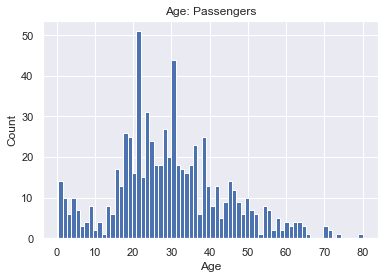

In [120]:
sns.set_theme()
titanic_df['Age'].hist(bins = 70)
plt.title('Age: Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('hist_sex.png')

In [159]:
np.std(titanic_df['Age'])

14.516321150817317

In [121]:
titanic_df['Age'].mean()

29.69911764705882

In [122]:
# value_counts is count function

titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

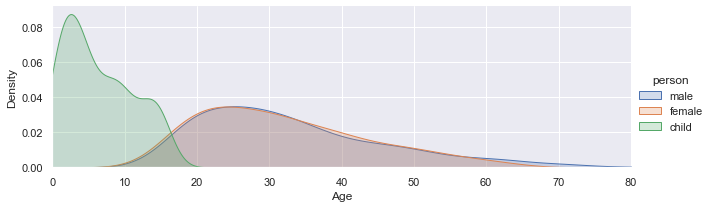

In [162]:
fig = sns.FacetGrid(titanic_df,hue = 'person',aspect = 3)

fig.map(sns.kdeplot,'Age',shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim = (0,oldest))

fig.add_legend()

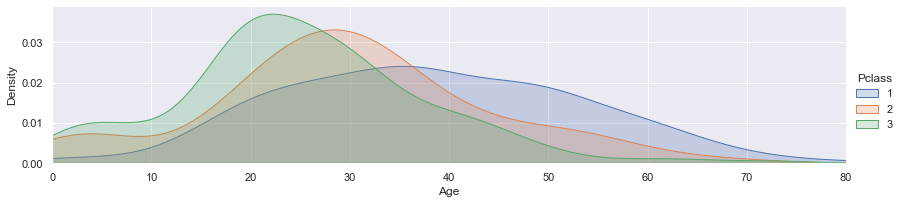

In [124]:
fig = sns.FacetGrid(titanic_df,hue = 'Pclass',aspect = 4)

fig.map(sns.kdeplot,'Age',shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim = (0,oldest))

fig.add_legend()

In [142]:
titanic_df.groupby(['Sex'])['Sex'].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

In [145]:
titanic_df.groupby(['Sex','Pclass']).count()

PassengerId  Survived  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Pclass                                                                 
female 1                94        94    94   85     94     94      94    94   
       2                76        76    76   74     76     76      76    76   
       3               144       144   144  102    144    144     144   144   
male   1               122       122   122  101    122    122     122   122   
       2               108       108   108   99    108    108     108   108   
       3               347       347   347  253    347    347     347   347   

               Cabin  Embarked  person  Alone  Survivor  
Sex    Pclass                                            
female 1          81        92      94     94        94  
       2          10        76      76     76        76  
       3           6       144     144    144       144  
male   1          95       122     122    122       122  
       2           6       108     108    108       108  
       3           6       347     347    347       347

In [148]:
titanic_df['Sex'].count()

891

In [166]:
# making a variable that has information about deck
deck = titanic_df['Cabin'].dropna()

In [167]:
titanic_df['Cabin'].count()

204

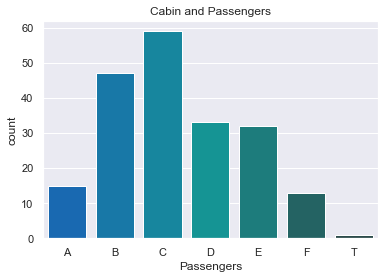

In [165]:
levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

sns.countplot(x = 'Cabin',
              data = cabin_df,
              palette = 'winter_d',
             order = ['A','B','C','D','E','F','T']) 
plt.title('Cabin and Passengers')
plt.xlabel('Passengers')
plt.savefig('cabin.png')
# order = ['list'] reorders the values on the x axis

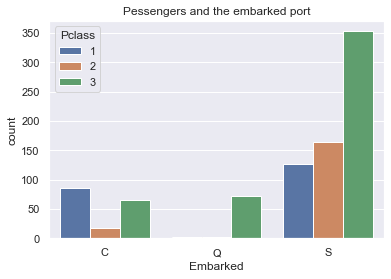

In [164]:
sns.countplot(x = 'Embarked',
             data = titanic_df,
             hue = 'Pclass',
             order = ['C','Q','S'])
plt.title('Pessengers and the embarked port')
plt.savefig('port.png')

In [130]:
# who was alone and who was with their family members?
# SibSp means sibling on board
# Parch means parents/children on board
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [131]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [132]:
# .loc basically makes labels and can be used with boolean like below
titanic_df['Alone'].loc[titanic_df['Alone'] > 0 ] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

/var/folders/9g/f32p_czs7lsgdd9g8wfn8_0m0000gn/T/ipykernel_2613/2170495635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Alone'].loc[titanic_df['Alone'] > 0 ] = 'With Family'


In [133]:
titanic_df['Alone']

0      With Family
1      With Family
2            Alone
3      With Family
4            Alone
          ...     
886          Alone
887          Alone
888    With Family
889          Alone
890          Alone
Name: Alone, Length: 891, dtype: object

Text(0.5, 1.0, 'Who Passengers Embarked on the Titanic With?')

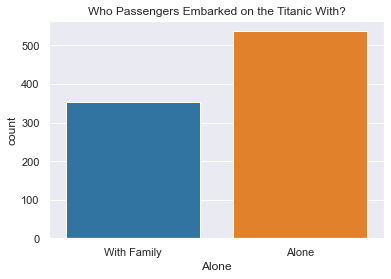

In [134]:
sns.countplot(x = 'Alone',
             data = titanic_df,
             palette = 'tab10')
plt.title('Who Passengers Embarked on the Titanic With?')

Text(0.5, 1.0, 'Titanic Survivor Visualization')

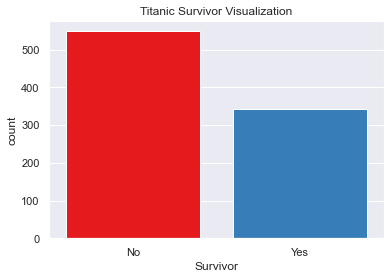

In [135]:
# what factors helped some survive the sinking?

# When making a new column, dataframe.['a new variable']
# dataframe.an existing variable.map({use dict like value:'a new value based on the existing value'})

titanic_df['Survivor'] = titanic_df.Survived.map({0:'No',1:'Yes'})
sns.countplot(x = 'Survivor',
             data = titanic_df,
             saturation = 2,
             palette = 'Set1')
plt.title('Titanic Survivor Visualization')

In [136]:
sns.set_theme(style = 'whitegrid')
sns.catplot(x = 'Pclass',
            y = 'Survived',
            hue = 'person'
            data = titanic_df,
           kind = 'point')
plt.title('Passenger Class and Survival Rate')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

SyntaxError: invalid syntax (864817309.py, line 5)

In [ ]:
sns.lmplot(x = 'Age',
          y = 'Survived',
          data = titanic_df,
          hue = 'Pclass')

In [ ]:
generation = [10,20,40,60,80]

sns.lmplot(x = 'Age',
          y = 'Survived',
          hue = 'Pclass',
          data = titanic_df,
          x_bins = generation)
plt.title('Linear Regression Model on Survival rate')

In [ ]:
sns.set_theme(style = 'white')
sns.lmplot(x = 'Age',
          y = 'Survived',
          hue = 'Sex',
          data = titanic_df,
          x_bins = generation)